<h2><b>Exploring different time series</b></h2>
<p>- Konark Verma</p>

Some examples of time series data:
<ol>
<li>Trends</li>
<li>Seasonality</li>
<li>Autocorrelation</li>
<li>White Noise</li>
</ol>

In this notebook we will explore all of the above time series along with their combinations as well.<br>
Most of the real world problems are combinations of all these, so exploring them help us understand them better.

In [1]:
# Importing the required libraries.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Function to plot the x-axis and y-axis along with there labels along with the graph.
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

<h3><b>Trends</b></h3>


In [3]:
# Function to plot trend.
def trend(time, slope=0):
    return slope * time

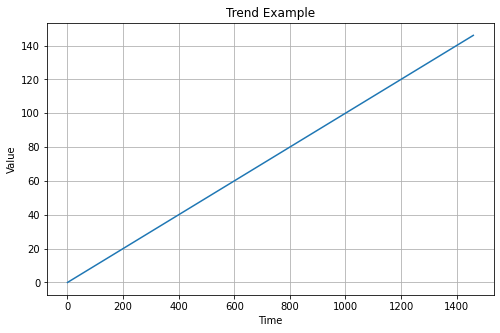

In [4]:
# Plotting an upward trend.
time = np.arange(4 * 365 + 1)
series = trend(time, 0.1)
plt.figure(figsize=(8, 5))
plt.title('Trend Example')
plot_series(time, series)
plt.show()

<h3><b>Seasonality</b></h3>


In [5]:
# Functions to generate an arbitrary seasonality data.
def seasonal_pattern(season_time):
    '''Just an arbitrary pattern'''
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    '''Repeats the same pattern at each period'''
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

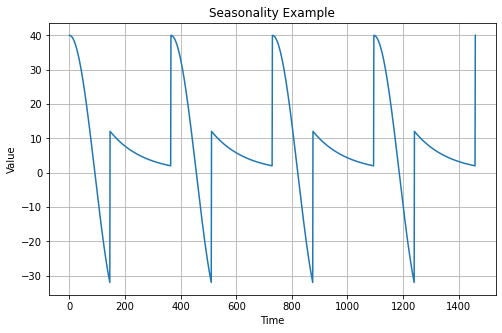

In [6]:
# Plotting a graph for seasonality.
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plt.figure(figsize=(8, 5))
plt.title('Seasonality Example')
plot_series(time, series)
plt.show()

<b><h3>Combination of both Trend and Seasonality</b></h3>

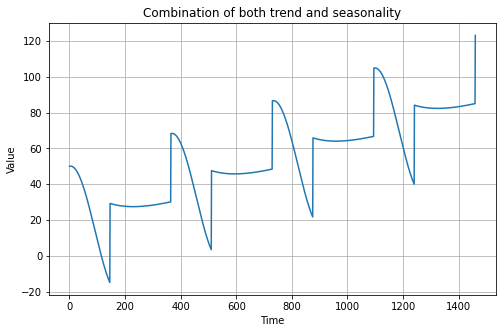

In [7]:
# Plotting a graph for a combination of both trend and seasonality.
baseline = 10
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plt.figure(figsize=(8, 5))
plt.title('Combination of both trend and seasonality')
plot_series(time, series)
plt.show()

<b><h3>White Noise</b></h3>

In [8]:
# Function to generate random noise.
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

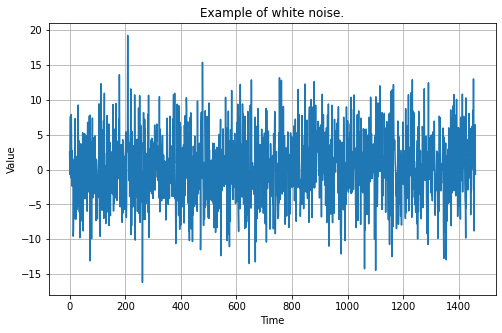

In [9]:
# Plotting a graph for white noise.
noise_level = 5
noise = white_noise(time, noise_level, seed=42)
plt.figure(figsize=(8, 5))
plt.title('Example of white noise.')
plot_series(time, noise)
plt.show()

<h3><b>Combination of Trend, Seasonality and White Noise
</b></h3>

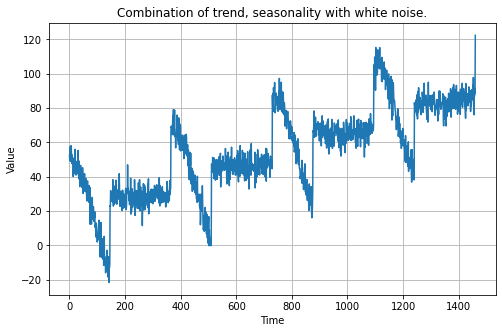

In [10]:
# Plotting a graph showing a combination for trend, seasonality and white noise.
series += noise
plt.figure(figsize=(8, 5))
plt.title('Combination of trend, seasonality with white noise.')
plot_series(time, series)
plt.show()

<h3><b>Autocorrelation</b></h3>

In [11]:
# Functions for autocorrelation.
def autocorrelation1(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    φ = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += φ * ar[step - 1]
    return ar[1:] * amplitude

def autocorrelation2(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    φ1 = 0.5
    φ2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time) + 50):
        ar[step] += φ1 * ar[step - 50]
        ar[step] += φ2 * ar[step - 33]
    return ar[50:] * amplitude

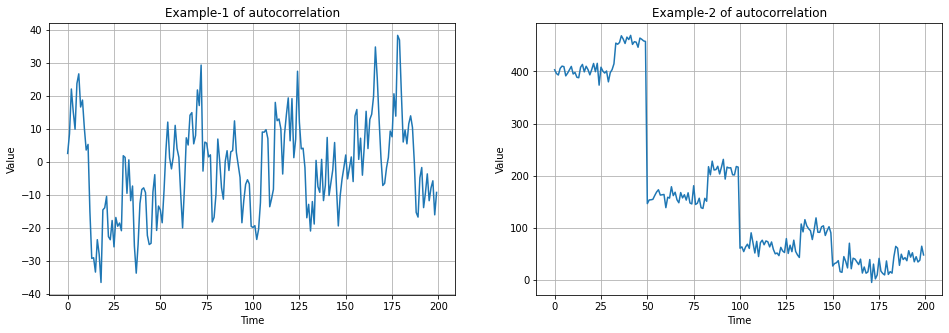

In [12]:
# Plotting graphs showing autocorrelation.
plt.figure(figsize=(16, 5))
plt.subplot(121)
series = autocorrelation1(time, 10, seed=42)
plt.title('Example-1 of autocorrelation')
plot_series(time[:200], series[:200])
plt.subplot(122)
series = autocorrelation2(time, 10, seed=42)
plt.title('Example-2 of autocorrelation')
plot_series(time[:200], series[:200])
plt.show()

<h3><b>Combination of Trend and Autocorrelation</b></h3>

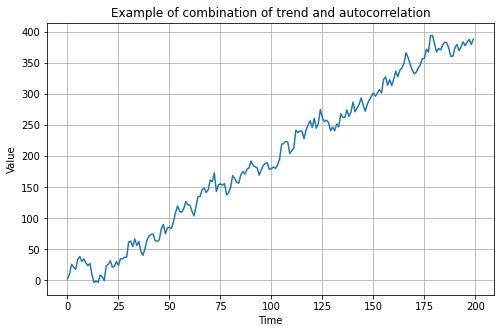

In [13]:
# Plotting a graph showing the combination of trend and autocorrelation.
series = autocorrelation1(time, 10, seed=42) + trend(time, 2)
plt.figure(figsize=(8, 5))
plt.title('Example of combination of trend and autocorrelation')
plot_series(time[:200], series[:200])
plt.show()

<h3><b>Combination of Trend, Seasonality and Autocorrelation</b></h3>

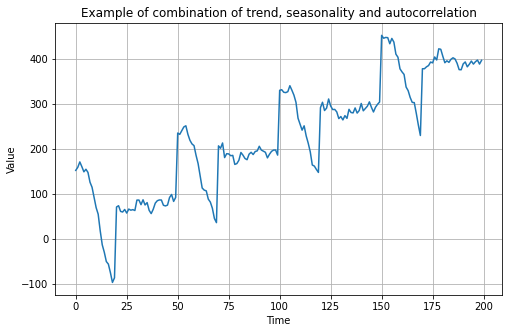

In [14]:
series = autocorrelation1(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plt.figure(figsize=(8, 5))
plt.title('Example of combination of trend, seasonality and autocorrelation')
plot_series(time[:200], series[:200])
plt.show()

<h3><b>Non Stationary Time Series</b></h3>

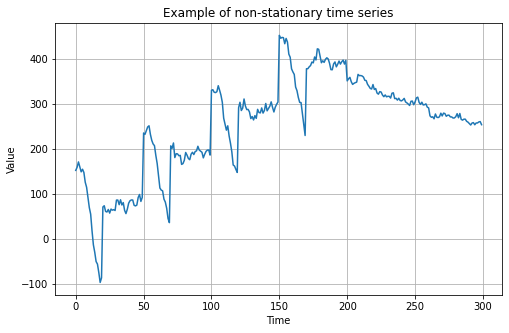

In [15]:
series = autocorrelation1(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation1(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
plt.figure(figsize=(8, 5))
plt.title('Example of non-stationary time series')
#series += noise(time, 30)
plot_series(time[:300], series[:300])
plt.show()

<h3><b>Combination of autocorrelation with impluses</b></h3>

In [16]:
# Functions for generating the combination of autocorrelation with impluses.
def impulses(time, num_impulses, amplitude=1, seed=None):
    rnd = np.random.RandomState(seed)
    impulse_indices = rnd.randint(len(time), size=10)
    series = np.zeros(len(time))
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude
    return series

def autocorrelation(source, φs):
    ar = source.copy()
    max_lag = len(φs)
    for step, value in enumerate(source):
        for lag, φ in φs.items():
            if step - lag > 0:
              ar[step] += φ * ar[step - lag]
    return ar

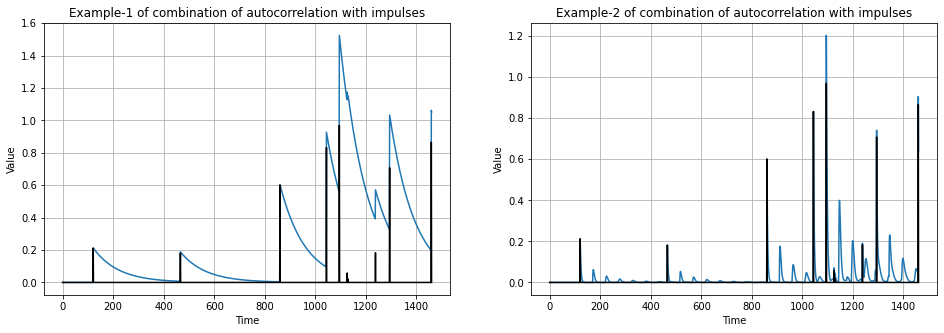

In [17]:
# Plotting the graphs showing combination of autocorrelation with impluses.
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.99})
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.title('Example-1 of combination of autocorrelation with impulses')
plot_series(time, series)
plt.plot(time, signal, "k-")
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.70, 50: 0.2})
plt.subplot(122)
plt.title('Example-2 of combination of autocorrelation with impulses')
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()